# WeightWatcher ResNet

https://calculationconsulting.com



## Calculations of Results

In [2]:
# Suppress the powerlaw package warnings
# "powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide"
# "powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide"
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Import WeightWatcher

set custom Logging at WARN Level

In [4]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.WARN)

import pytorchcv
from pytorchcv.model_provider import get_model as ptcv_get_model
import torch

import weightwatcher as ww
ww.__version__


Using TensorFlow backend.


'0.2.2'

In [5]:
len(pytorchcv.model_provider._models.keys())

685

In [18]:
series_name = 'ResNet'


all_names = []
all_models = []

for modelname in pytorchcv.model_provider._models.keys():
    if  modelname.startswith('resnet'):
        if 'cifar' not in modelname :
            if 'svhn' not in modelname :
                if 'cub' not in modelname :
                    
                    print(modelname)
                    try:
                        model = ptcv_get_model(modelname, pretrained=True)
                        all_models.append(model)
                        all_names.append(modelname)

                    except Exception as err:
                        print(err)
                        print("{} not found".format(modelname))


resnet10
resnet12
resnet14
resnetbc14b
resnet16
resnet18_wd4
resnet18_wd2
resnet18_w3d4
resnet18
resnet26
resnetbc26b
resnet34
resnetbc38b
resnet50
resnet50b
resnet101
resnet101b
resnet152
resnet152b
resnet200
Pretrained model for resnet200 is not available.
resnet200 not found
resnet200b
Pretrained model for resnet200b is not available.
resnet200b not found
resnetd50b
resnetd101b
resnetd152b


### Only using the first 19 ResNets

In [54]:
all_names, len(all_names)

(['resnet10',
  'resnet12',
  'resnet14',
  'resnetbc14b',
  'resnet16',
  'resnet18_wd4',
  'resnet18_wd2',
  'resnet18_w3d4',
  'resnet18',
  'resnet26',
  'resnetbc26b',
  'resnet34',
  'resnetbc38b',
  'resnet50',
  'resnet50b',
  'resnet101',
  'resnet101b',
  'resnet152',
  'resnet152b',
  'resnetd50b',
  'resnetd101b',
  'resnetd152b'],
 22)

In [62]:
all_names = all_names[0:19]
all_names

['resnet10',
 'resnet12',
 'resnet14',
 'resnetbc14b',
 'resnet16',
 'resnet18_wd4',
 'resnet18_wd2',
 'resnet18_w3d4',
 'resnet18',
 'resnet26',
 'resnetbc26b',
 'resnet34',
 'resnetbc38b',
 'resnet50',
 'resnet50b',
 'resnet101',
 'resnet101b',
 'resnet152',
 'resnet152b']

### Get reported accuracies from OSMR website

https://github.com/osmr/imgclsmob

<pre>
<table class="docutils align-default">
<td>ResNet-10</td>
<td align=right>34.69</td>
<td align=right>14.36</td>
<td align=right>5,418,792</td>
<td align=right>894.04M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.248/resnet10-1436-67d9a618.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-12</td>
<td align=right>33.62</td>
<td align=right>13.28</td>
<td align=right>5,492,776</td>
<td align=right>1,126.25M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.253/resnet12-1328-d7d2f4d6.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-14</td>
<td align=right>32.45</td>
<td align=right>12.46</td>
<td align=right>5,788,200</td>
<td align=right>1,357.94M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.256/resnet14-1246-d5b55c11.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-BC-14b</td>
<td align=right>30.66</td>
<td align=right>11.51</td>
<td align=right>10,064,936</td>
<td align=right>1,479.12M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.309/resnetbc14b-1151-ca61209c.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-16</td>
<td align=right>30.49</td>
<td align=right>11.18</td>
<td align=right>6,968,872</td>
<td align=right>1,589.34M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.259/resnet16-1118-d54bc41a.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-18 x0.25</td>
<td align=right>39.62</td>
<td align=right>17.85</td>
<td align=right>3,937,400</td>
<td align=right>270.94M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.262/resnet18_wd4-1785-fe79b31f.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-18 x0.5</td>
<td align=right>33.80</td>
<td align=right>13.27</td>
<td align=right>5,804,296</td>
<td align=right>608.70M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.263/resnet18_wd2-1327-6654f50a.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-18 x0.75</td>
<td align=right>30.40</td>
<td align=right>11.06</td>
<td align=right>8,476,056</td>
<td align=right>1,129.45M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.266/resnet18_w3d4-1106-3636648b.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-18</td>
<td align=right>28.53</td>
<td align=right>9.82</td>
<td align=right>11,689,512</td>
<td align=right>1,820.41M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.153/resnet18-0982-0126861b.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-26</td>
<td align=right>26.30</td>
<td align=right>8.54</td>
<td align=right>17,960,232</td>
<td align=right>2,746.79M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.305/resnet26-0854-25834733.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-BC-26b</td>
<td align=right>25.09</td>
<td align=right>7.97</td>
<td align=right>15,995,176</td>
<td align=right>2,356.67M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.313/resnetbc26b-0797-7af52a73.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-34</td>
<td align=right>24.84</td>
<td align=right>7.80</td>
<td align=right>21,797,672</td>
<td align=right>3,672.68M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.291/resnet34-0780-3f775482.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-BC-38b</td>
<td align=right>23.69</td>
<td align=right>7.00</td>
<td align=right>21,925,416</td>
<td align=right>3,234.21M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.328/resnetbc38b-0700-3fbac61d.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-50</td>
<td align=right>22.28</td>
<td align=right>6.33</td>
<td align=right>25,557,032</td>
<td align=right>3,877.95M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.329/resnet50-0633-b00d1c8e.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-50b</td>
<td align=right>22.39</td>
<td align=right>6.38</td>
<td align=right>25,557,032</td>
<td align=right>4,110.48M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.308/resnet50b-0638-8a5473ef.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-101</td>
<td align=right>21.90</td>
<td align=right>6.22</td>
<td align=right>44,549,160</td>
<td align=right>7,597.95M</td>
<td>From <a href="https://github.com/dmlc/gluon-cv" rel=nofollow>dmlc/gluon-cv</a> (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.1/resnet101-0622-ab0cf005.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-101b</td>
<td align=right>20.59</td>
<td align=right>5.30</td>
<td align=right>44,549,160</td>
<td align=right>7,830.48M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.357/resnet101b-0530-f059ba3c.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-152</td>
<td align=right>21.01</td>
<td align=right>5.50</td>
<td align=right>60,192,808</td>
<td align=right>11,321.85M</td>
<td>From <a href="https://github.com/dmlc/gluon-cv" rel=nofollow>dmlc/gluon-cv</a> (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.144/resnet152-0550-800b2cb1.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-152b</td>
<td align=right>19.92</td>
<td align=right>4.99</td>
<td align=right>60,192,808</td>
<td align=right>11,554.38M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.378/resnet152b-0499-667ea926.pth.log" rel=nofollow>log</a>)</td>
</tr>

</tbody>
</table>
</pre>

In [56]:
top1_errors= {
  
"resnet10": 34.69,
"resnet12": 33.62,
"resnet14": 32.45,
"resnetbc14b": 30.66,
"resnet16": 30.49,
"resnet18_wd4": 39.62,
"resnet18_wd2": 33.80,
"resnet18_w3d4": 30.40,
"resnet18": 28.53,
"resnet26": 26.30,
"resnetbc26b": 25.09,
"resnet34": 24.84,
"resnetbc38b": 23.69,
"resnet50": 22.28,
"resnet50b": 22.39,
"resnet101": 21.90,
"resnet101b": 20.59,
"resnet152": 21.01,
"resnet152b": 19.92,
    
}

## Run WeightWatcher, collect summary and details (as dataframes) for all models

In [21]:
all_details = []
all_summaries = []
for im, name in enumerate(all_names):
    print(name)
    model = all_models[im]
    watcher = ww.WeightWatcher(model, logger=logger)
    results = watcher.analyze(alphas=True, softranks=True, spectralnorms=True, mp_fit=True)

    summary =  watcher.get_summary()
    all_summaries.append(summary)
    details  = watcher.get_details(results=results)
    details.drop(columns=['slice', 'slice_count'], inplace=True)
    details.dropna(inplace=True)
    details['NxM'] = pd.to_numeric(details.N * details.M)

    all_details.append(details)

resnet10
resnet12
resnet14
resnetbc14b
resnet16
resnet18_wd4
resnet18_wd2
resnet18_w3d4
resnet18
resnet26
resnetbc26b
resnet34
resnetbc38b
resnet50
resnet50b
resnet101
resnet101b
resnet152
resnet152b
resnetd50b
resnetd101b
resnetd152b


In [51]:
import pandas as pd
tables = pd.read_html("pytorchcv.html")

In [45]:
tables[1]

,Model,"Error, %",Params,FLOPs/2,Remarks
0,NIN,7.43,966986,222.97M,Converted from GL model (log)
1,ResNet-20,5.97,272474,41.29M,Converted from GL model (log)
2,ResNet-56,4.52,855770,127.06M,Converted from GL model (log)
3,ResNet-110,3.69,1730714,255.70M,Converted from GL model (log)
4,ResNet-164(BN),3.68,1704154,255.31M,Converted from GL model (log)
5,ResNet-1001,3.28,10328602,"1,536.40M",Converted from GL model (log)
6,ResNet-1202,3.53,19424026,"2,857.17M",Converted from GL model (log)
7,PreResNet-20,6.51,272282,41.27M,Converted from GL model (log)
8,PreResNet-56,4.49,855578,127.03M,Converted from GL model (log)
9,PreResNet-110,3.86,1730522,255.68M,Converted from GL model (log)


In [69]:
plt.rcParams.update({'font.size': 14})
from pylab import rcParams
rcParams['figure.figsize'] = 12, 12

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

def plot_test_accuracy(metric, xlabel, title):
    """Create plot of Metric vs Reported Test Accuracy, and run Linear Regression"""
    num = len(all_names)
    xs, ys = np.empty(num), np.empty(num)
    for im, modelname in enumerate(all_names):    

        summary = all_summaries[im]
        x = summary[metric]
        xs[im] = x

        error = top1_errors[modelname]
        y = 100.0-error
        ys[im] = y

        label = modelname
        plt.scatter(x, y, label=label)


    xs = xs.reshape(-1,1)
    ys = ys.reshape(-1,1)
    regr = LinearRegression()
    regr.fit(xs, ys)
    y_pred = regr.predict(xs)
    plt.plot(xs, y_pred, color='red', linewidth=1)

    rmse = np.sqrt(metrics.mean_squared_error(ys, y_pred))
    r2 = metrics.r2_score(ys, y_pred)
    title2 = "RMSE: {0:.2}   R2: {0:.2}".format(rmse, r2)
    
    plt.legend()
    plt.title(r"Test Accuracy vs "+title+"\n"+title2)
    plt.ylabel(r"Test Accuracy")
    plt.xlabel(xlabel);
    plt.show()


In [77]:
def plot_metrics_histogram(metric, xlabel, title, log=False, valid_ids = []):
    transparency = 1.0
    
    if len(valid_ids) == 0:
        valid_ids = range(len(all_details)-1)
        
    for im, details in enumerate(all_details):
        if im in valid_ids:
            vals = details[metric].to_numpy()
            if log:
                vals = np.log10(np.array(vals+0.000001, dtype=np.float))

            plt.hist(vals, bins=100, label=all_names[im], alpha=transparency, density=True)
            transparency -= 0.15

    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()
    


In [84]:
def plot_metrics_depth(metric, ylabel, title, log=False, valid_ids = []):
    transparency = 1.0
    
    if len(valid_ids) == 0:
        valid_ids = range(len(all_details)-1)
        
    for im, details in enumerate(all_details):
        if im in valid_ids:
            
            details = all_details[im]
            name = all_names[im]
            x = details.index.to_numpy()
            y = details[metric].to_numpy()
            if log:
                y = np.log10(np.array(y+0.000001, dtype=np.float))

            plt.scatter(x,y, label=name)

    plt.legend()
    plt.title(title)
    plt.xlabel("Layer id")
    plt.ylabel(xlabel)
    plt.show()

## Metrics vs Test Accuracy

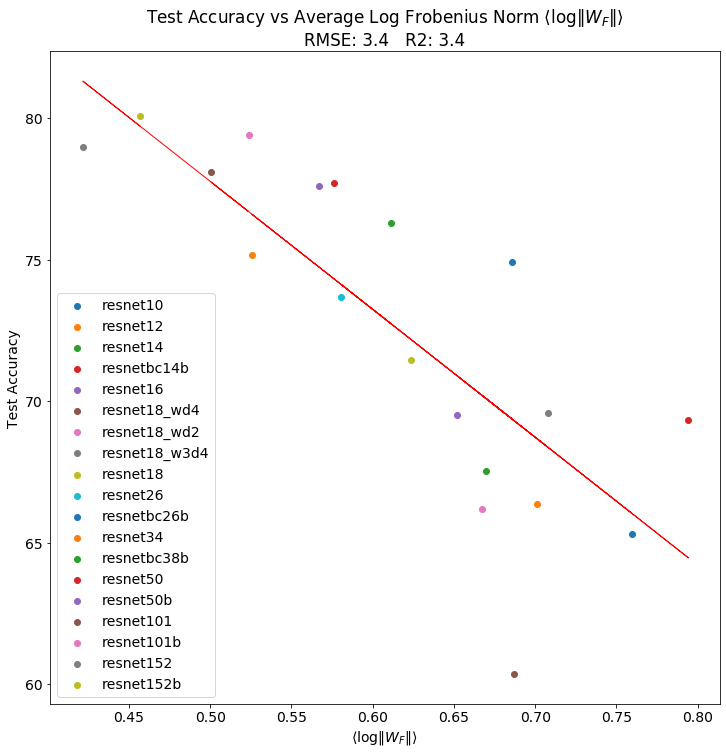

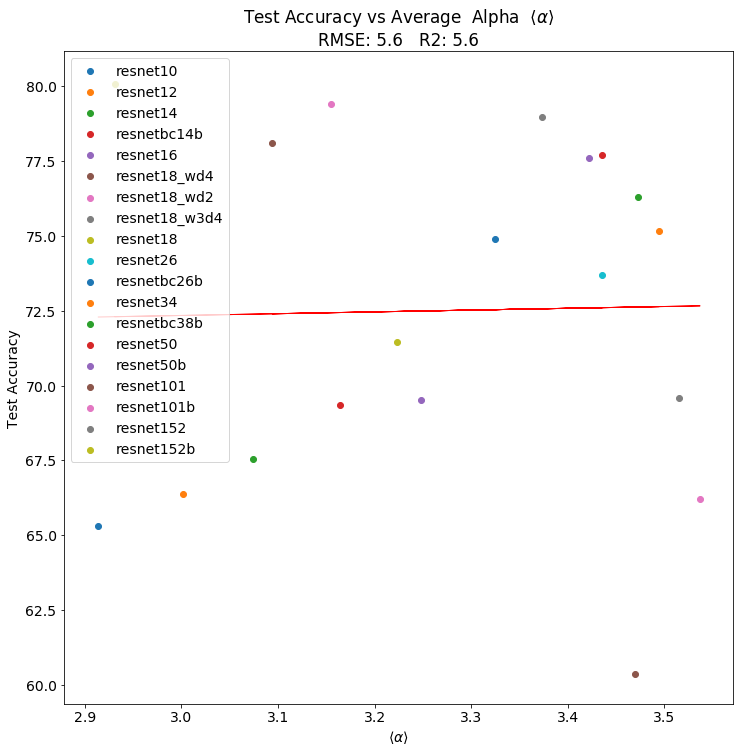

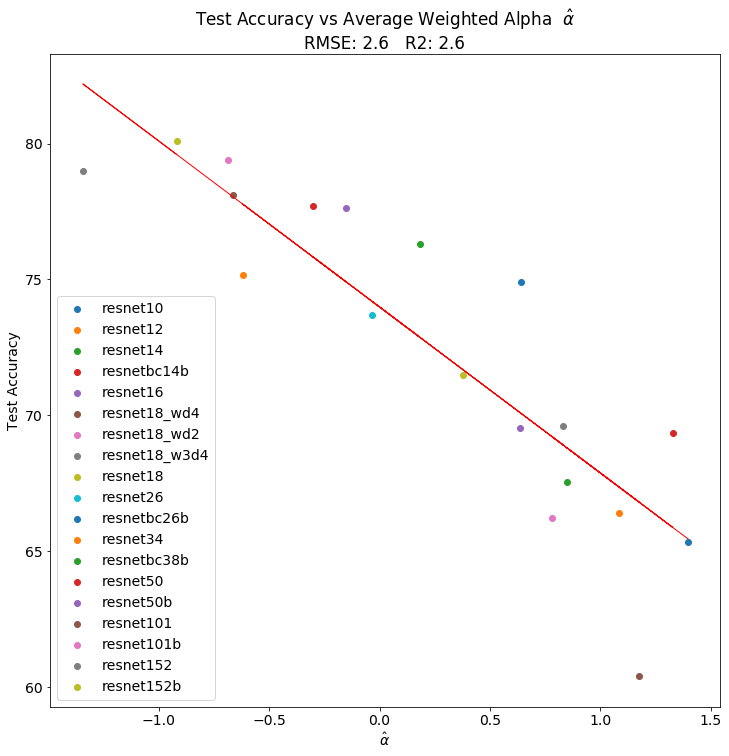

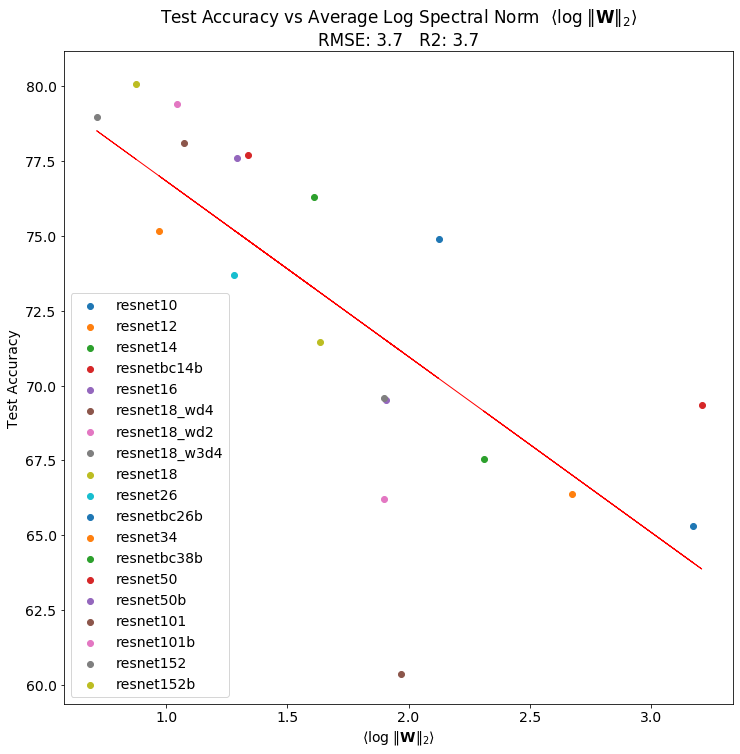

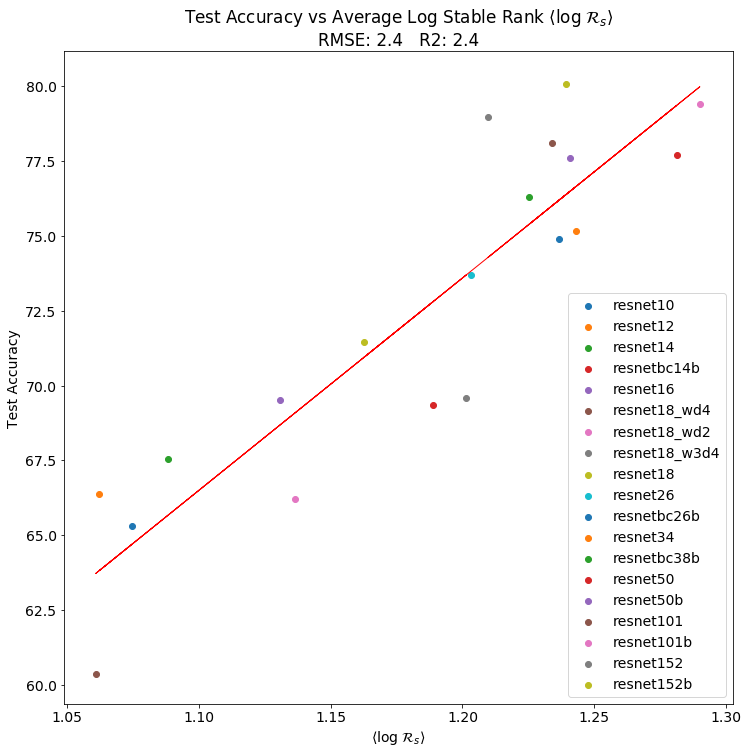

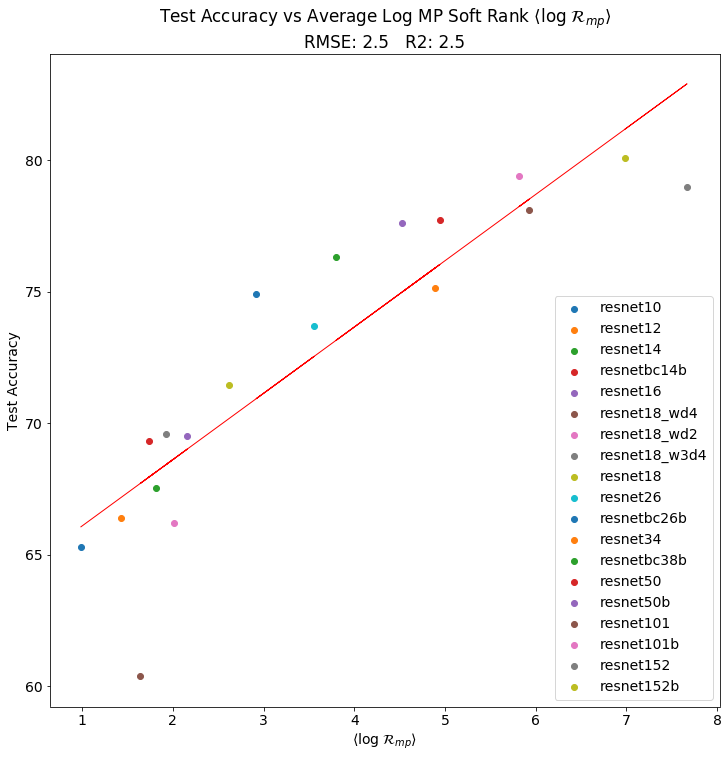

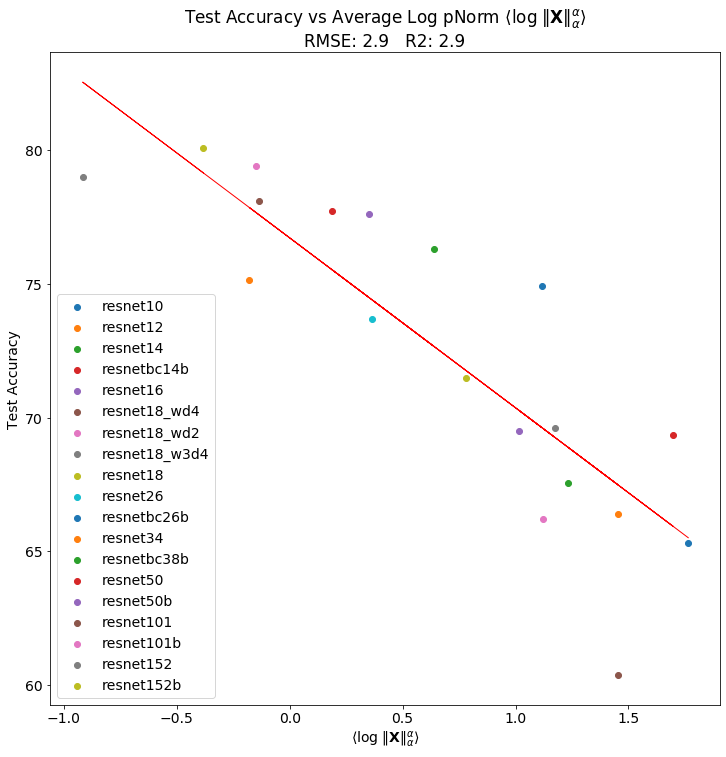

In [85]:
metric = "lognorm"
xlabel = r"$\langle\log\Vert W_{F}\Vert\rangle$"
title = "Average Log Frobenius Norm "+xlabel
plot_test_accuracy(metric, xlabel, title)


metric = "alpha"
xlabel = r"$\langle\alpha\rangle$"
title = "Average  Alpha  "+xlabel
plot_test_accuracy(metric, xlabel, title)

metric = "alpha_weighted"
xlabel = r"$\hat{\alpha}$"
title = "Average Weighted Alpha  "+xlabel
plot_test_accuracy(metric, xlabel, title)

metric = "spectralnorm"
xlabel = r"$\langle\log\;\Vert\mathbf{W}\Vert_{2}\rangle$"
title = "Average Log Spectral Norm  "+xlabel
plot_test_accuracy(metric, xlabel, title)

metric = "softranklog"
xlabel = r"$\langle\log\;\mathcal{R}_{s}\rangle$"
title = "Average Log Stable Rank "+xlabel
plot_test_accuracy(metric, xlabel, title)

metric = "softrank_mp"
xlabel = r"$\langle\log\;\mathcal{R}_{mp}\rangle$"
title = "Average Log MP Soft Rank "+xlabel
plot_test_accuracy(metric, xlabel, title)

metric = "logpnorm"
xlabel = r"$\langle\log\;\Vert\mathbf{X}\Vert^{\alpha}_{\alpha}\rangle$"
title = "Average Log pNorm "+xlabel
plot_test_accuracy(metric, xlabel, title)